<a href="https://colab.research.google.com/github/hyeji0913/deeplearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1.Linear Function



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
Hare_Speed = 2 #@param {type:"slider",min:0,max:10,step:1}

MAXVAL =10
INTERVAL = MAXVAL + 1
h_xdata, h_ydata = [],[]


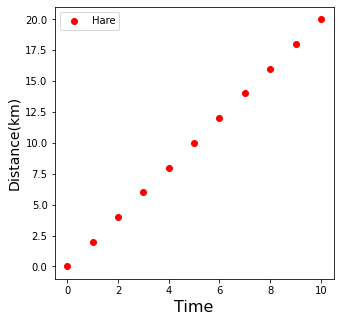

In [3]:
#configure figure size
plt.figure(figsize=(5,5))
for t in np.linspace(0,MAXVAL, INTERVAL):
    h_y = Hare_Speed*t
    h_xdata.append(t)
    h_ydata.append(h_y)
 
plt.plot(h_xdata, h_ydata, 'ro', label='Hare')

plt.xlabel('Time',fontsize=16)
plt.ylabel('Distance(km)', fontsize=14)
plt.legend()

plt.show()

#2.hypothesis

In [4]:
Velocity_Variance =0.2 #@param {type:"slider",min:0,max:2,step:0.1}
LINES = 5

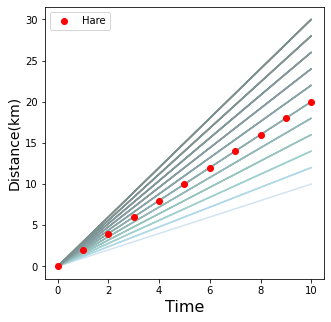

In [5]:
#configure figure size
plt.figure(figsize=(5,5))

a_val = Hare_Speed + (Velocity_Variance * LINES)
h_xdata, h_ydata, v_xdata,v_ydata =[], [], [], []
for t in np.linspace(0,MAXVAL, INTERVAL):
    h_y = Hare_Speed*t
    h_xdata.append(t)
    h_ydata.append(h_y)
    a= a_val - (t * Velocity_Variance)
    for i in np.linspace(0, MAXVAL, INTERVAL):
      h_y = a*i
      v_xdata.append(i)
      v_ydata.append(h_y)
    plt.plot(v_xdata,v_ydata, alpha=0.2)

plt.plot(h_xdata, h_ydata, 'ro', label='Hare')

plt.xlabel('Time',fontsize=16)
plt.ylabel('Distance(km)', fontsize=14)
plt.legend()

plt.show()

#3.Cost,Gradient Decent

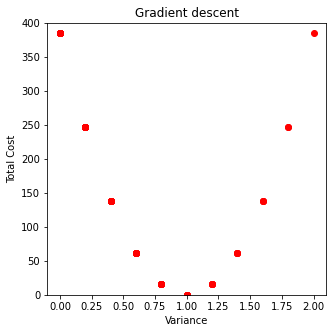

In [12]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

#configure figure size
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlim(-0.1,2.1)
ax.set_ylim(0,400)
t_xdata, t_ydata =[], []

def get_cost(a_val):
  cost=0
  for i in np.linspace(0,MAXVAL,INTERVAL):
    cost += pow((a_val*i - Hare_Speed*i),2)
  return cost

def animateFrame(frame):
  a_val = Hare_Speed +(Velocity_Variance * LINES)
  i = frame * Velocity_Variance
  a = a_val -i
  t_xdata.append(i)
  t_ydata.append(get_cost(a))
  plot = ax.plot(t_xdata, t_ydata, 'ro')
  return plot

anim =animation.FuncAnimation(fig, animateFrame, frames=np.linspace(0,MAXVAL,INTERVAL),blit=True, repeat=False)

ax.set_title('Gradient descent')
ax.set_ylabel("Total Cost")
ax.set_xlabel("Variance")

anim